# Import software libraries and load the dataset #

In [32]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.models import Sequential
from keras.utils import to_categorical, plot_model
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Activation


# Load the fashion mnist dataset

- Dataset provided from keras.
- Print the number of training images and testing images.
- Print the number of labels (unique).

In [33]:
df = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = df.load_data()

print(f"Number of training images: {train_images.shape}")
print(f"Number of testing images: {test_images.shape}")

unique_labels = len(set(train_labels))
print(f"Number of unique labels: {unique_labels}")

Number of training images: (60000, 28, 28)
Number of testing images: (10000, 28, 28)
Number of unique labels: 10


# What is the shape of each image?

In [34]:
print(f"Shape of each image: {train_images[0].shape}")

Shape of each image: (28, 28)


# The labels are encoded, find the name of each encoded label.

In [35]:
label_names = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

for label in label_names:
    print(f"Label '{label}' represents: {label_names[label]}")

Label '0' represents: T-shirt/top
Label '1' represents: Trouser
Label '2' represents: Pullover
Label '3' represents: Dress
Label '4' represents: Coat
Label '5' represents: Sandal
Label '6' represents: Shirt
Label '7' represents: Sneaker
Label '8' represents: Bag
Label '9' represents: Ankle boot


# Plot 25 samples from the dataset

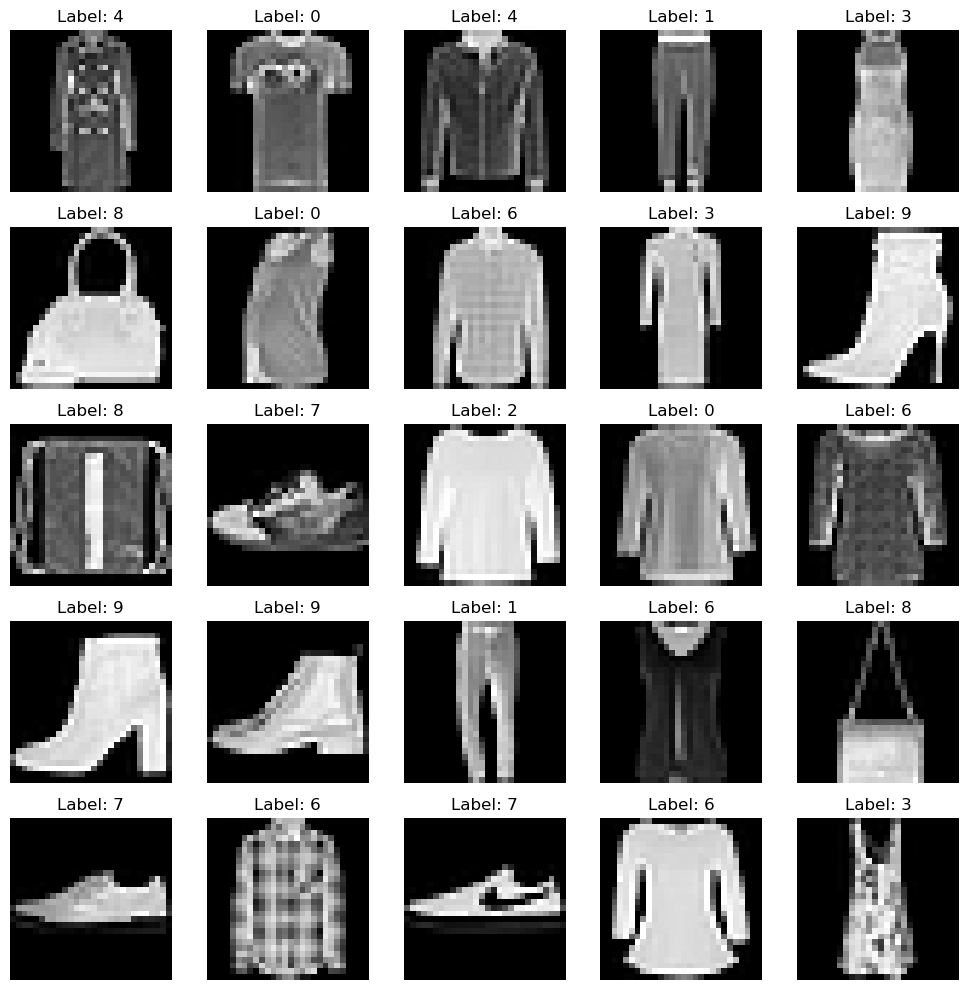

In [36]:
num_samples = 25
indices = np.random.choice(train_images.shape[0], num_samples, replace=False)

plt.figure(figsize=(10, 10))
for i, index in enumerate(indices, 1):
    plt.subplot(5, 5, i)
    plt.imshow(train_images[index], cmap='gray')
    plt.title(f"Label: {train_labels[index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Prepare the data for training with Keras

- Hint : Use reshape method.
- Do not forget the one hot encoding process (use the method provided from keras).

In [37]:
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

nClasses = 10  
train_labels = tf.keras.utils.to_categorical(train_labels, nClasses)
test_labels = tf.keras.utils.to_categorical(test_labels, nClasses)

# Split the datasets into training and testing

- Hint : Use the training set (training and validation sets).
- Do not worry about the testing set provided from the dataset we will get with later on, do not touch it!!

In [38]:
from sklearn.model_selection import train_test_split


train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.1, random_state=42)


# Build the CNN structure

- The model contains the following layers :-

    1 - First Conv Layer :-
    
    2 - Activation Layer
    
    3 - Pooling Layer
    
    4 - Second Conv Layer
    
    5 - Activation Layer
    
    6 - Pooling Layer
    
    7 - Third Conv Layer
    
    8 - Activation Layer
    
    9 - Pooling Layer
    
    10 - Flatten Layer
    
    11 - Dense Layer
    
    In the Conv layers we have these parameters :-
    
        a. filters : What is the number of filters of the Conv layer, make it 32 (try to change it if you want).
        b. kernel_size : The filter size of the Conv layer, make it 3 by 3 (again try to change it).
        c. input_shape : The image shape.
        d. padding : make it same.
        e. activation : make it linear (also try to change it).
    
    In the hidden layers, we have three activation layers. Search for the best activation function used in our problem, give
    your reasons why did you use it, then use it.
    
    In the Activation layers we have this parameter :-
    
        a. alpha : make it 0.1 (try to change it).
        
    In the Pooling layers we have these parameters :-
    
        a. pool_size : the pooling window size, make it 2 by 2 (try to change it).
        b. padding : make it same.
        
    In the Flatten layer, make it default, because it is basically convert the tensors into vectors.
    
    In the Dense layer we have these parameters :-
    
        a. units : the number of output labels.
        b. activation : the function that will deal with the outputs and find the probability for each one.
            Note : There are several activation functions as an output function, select the sutable for our problem.

In [40]:
def createModel():
    
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28,28,1)))
    
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    

    model.add(Flatten())
        
    
    model.add(Dense(nClasses, activation='softmax'))
    return model

model = createModel()

# Compile the model and examine the layers

- Find the best optimizer.
- What is the best loss function in this problem? (multi class).
- Do not forget the metric!! What is the best metric??

In [41]:
model.compile(
    optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']
)

# Give me a summary of the NN

In [42]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                 

# Plot the structure of the NN and save it as a png image.

- Hint : Use plot_model function from keras.utils

In [43]:
plot_model(model, to_file='neural_network_structure.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


# Train the model

- The x parameter should receive the training images.
- The y parameter should receive the training labels.
- The validation_data parameter should receive the validation data (the data we use with train_test_split).
- The epochs parameter should receive the number of epochs in the model, you can make it 1 it is ok.
    Note : You can increase the epochs, this will decrease the loss, but the loss will stop decreasing in sometimes.
- Make the verbose parameter 1.

In [26]:
history = model.fit(
    train_images, train_labels, batch_size=256,
    epochs=50, verbose=1, validation_data=(val_images,val_labels)
)

Epoch 1/50


211/211 [==============================] - 27s 99ms/step - loss: 1.4151 - accuracy: 0.7760 - val_loss: 0.3849 - val_accuracy: 0.8625
Epoch 2/50
211/211 [==============================] - 17s 79ms/step - loss: 0.3387 - accuracy: 0.8772 - val_loss: 0.3043 - val_accuracy: 0.8885
Epoch 3/50
211/211 [==============================] - 17s 82ms/step - loss: 0.2685 - accuracy: 0.9001 - val_loss: 0.3320 - val_accuracy: 0.8787
Epoch 4/50
211/211 [==============================] - 18s 85ms/step - loss: 0.2255 - accuracy: 0.9159 - val_loss: 0.2704 - val_accuracy: 0.9017
Epoch 5/50
211/211 [==============================] - 18s 87ms/step - loss: 0.1949 - accuracy: 0.9267 - val_loss: 0.2764 - val_accuracy: 0.9032
Epoch 6/50
211/211 [==============================] - 17s 80ms/step - loss: 0.1668 - accuracy: 0.9370 - val_loss: 0.2871 - val_accuracy: 0.9058
Epoch 7/50
211/211 [==============================] - 18s 86ms/step - loss: 0.1431 - accuracy: 0.9464 - val_loss: 0.3102 - val_accurac

# Evaluate the model on the test data

- Use evaluate function to find the performance of the model.
- The x parameter should receive the testing images (the testing images we get from the dataset).
- The y parameter should receive the testing labels.
- You need to print the metric you choose before and the loss values.

In [27]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 7ms/step - loss: 1.2428 - accuracy: 0.9098


[1.2428371906280518, 0.9097999930381775]

# Make predictions on the test data

- Just print the first ten predictions and compare them with the actual values.

In [28]:
predictions = model.predict(test_images)
for i in range(10):
    predicted_label = tf.argmax(predictions[i]).numpy()
    actual_label = tf.argmax(test_labels[i]).numpy()
    print(f"Predicted: {predicted_label}, Actual: {actual_label}")

313/313 [==============================] - 4s 7ms/step
Predicted: 9, Actual: 9
Predicted: 2, Actual: 2
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 6, Actual: 6
Predicted: 1, Actual: 1
Predicted: 4, Actual: 4
Predicted: 6, Actual: 6
Predicted: 5, Actual: 5
Predicted: 7, Actual: 7


# Visualize the predictions for several examples (25 is enough).

- For each image, print the image with the actual value and predicted value.

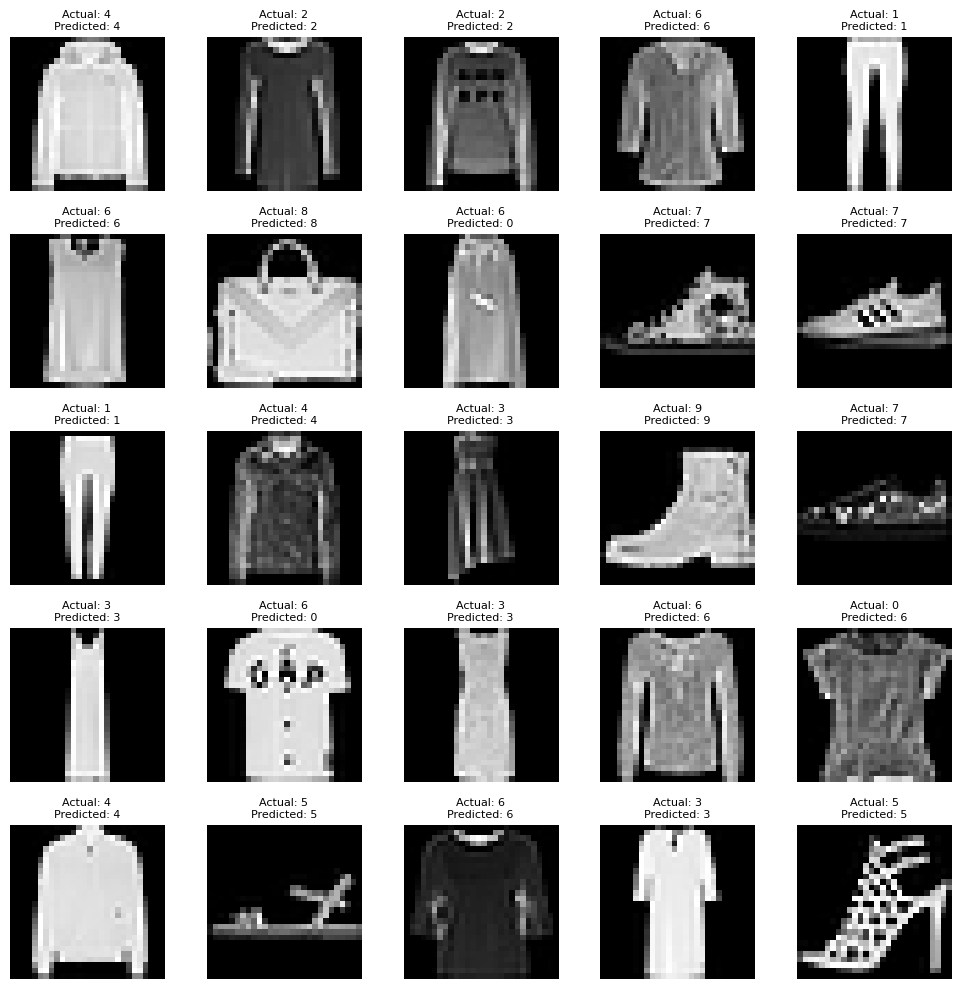

In [29]:
indices = np.random.choice(test_images.shape[0], 25, replace=False)

plt.figure(figsize=(10, 10))
for i, index in enumerate(indices, 1):
    plt.subplot(5, 5, i)
    plt.imshow(test_images[index].reshape(28, 28), cmap='gray')  # Display the image
    predicted_label = np.argmax(predictions[index])
    actual_label = np.argmax(test_labels[index])
    plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}", fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Save the model as pickle file

In [30]:
import pickle

pickle.dump(model, open('model.pkl','wb')) 